In [16]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.datasets import cifar10

In [17]:
# load the training and testing data, then scale it into the
# range [0, 1]
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

# convert the labels from integers to vectors
lb = LabelBinarizer()

[INFO] loading CIFAR-10 data...


In [18]:
width=32
height=32
depth=3
classes=10


In [19]:
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

 # initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
 "dog", "frog", "horse", "ship", "truck"]

In [20]:
model = Sequential()
inputShape = (height, width, depth)

# if we are using "channels first", update the input shape
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(50, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
model.add(Dense(classes))
model.add(Activation("softmax"))

In [21]:
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
batch_size=32, epochs=40, verbose=1)

[INFO] compiling model...
[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 163s 3ms/step - loss: 1.8583 - accuracy: 0.3349 - val_loss: 1.8997 - val_accuracy: 0.3146
Epoch 2/40
50000/50000 [==============================] - 163s 3ms/step - loss: 1.4938 - accuracy: 0.4684 - val_loss: 1.4517 - val_accuracy: 0.4830
Epoch 3/40
50000/50000 [==============================] - 163s 3ms/step - loss: 1.3376 - accuracy: 0.5276 - val_loss: 1.3851 - val_accuracy: 0.5111
Epoch 4/40
50000/50000 [==============================] - 161s 3ms/step - loss: 1.2201 - accuracy: 0.5713 - val_loss: 1.3173 - val_accuracy: 0.5279
Epoch 5/40
50000/50000 [==============================] - 161s 3ms/step - loss: 1.1165 - accuracy: 0.6081 - val_loss: 1.1739 - val_accuracy: 0.5807
Epoch 6/40
50000/50000 [==============================] - 161s 3ms/step - loss: 1.0267 - accuracy: 0.6428 - val_loss: 1.0609 - val_accuracy: 0.6245
Epoch 7/4

In [24]:
# evaluate the networkprint("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.73      0.78      0.75      1000
  automobile       0.81      0.77      0.79      1000
        bird       0.62      0.58      0.60      1000
         cat       0.51      0.50      0.51      1000
        deer       0.63      0.66      0.65      1000
         dog       0.58      0.58      0.58      1000
        frog       0.74      0.78      0.76      1000
       horse       0.77      0.76      0.76      1000
        ship       0.82      0.80      0.81      1000
       truck       0.75      0.76      0.75      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



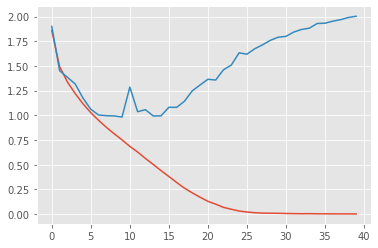

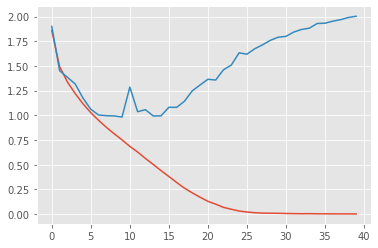

In [25]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")